In [1]:
import pandas as pd
import string
import emoji
import re

Get emoji regex

In [2]:
emoji_regex = emoji.get_emoji_regexp()

## Import data

There are around 30k duplicates

In [3]:
train = pd.read_csv('train.csv')
train = train.drop_duplicates(['review', 'rating'])
test = pd.read_csv('test.csv')

train

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5
146806,146806,Excellent product quality delivery speed is ve...,5
146807,146807,thanks gan,5
146808,146808,Awesome awesome quality merchandise value CP ...,5


## Clean data

- Punctuations that likely won't impact the sentiment `+*`
- Remove hashtag `#[a-z]+`
- Remove mention `@[a-z]+`
- Remove hyperlinks `http.+`


In [4]:
train['review_clean'] = train['review'].str.lower()

train['review_clean'] = train['review_clean'].str.replace(r'’', '\'')
train['review_clean'] = train['review_clean'].str.replace(r'#[a-z]+', ' ')
train['review_clean'] = train['review_clean'].str.replace(r'@[a-z]+', ' ')
train['review_clean'] = train['review_clean'].str.replace(r'[\+\*=@#<>\(\)\[\]\^_]+', ' ')
train['review_clean'] = train['review_clean'].str.replace(r'[,!?;.:]+', '. ')

# Remove some repeated words
train['review_clean'] = train['review_clean'].str.replace(r'(other ){2,}', 'other ')
train['review_clean'] = train['review_clean'].str.replace(r'(kg ){2,}', 'kg ')
train['review_clean'] = train['review_clean'].str.replace(r'(mm ){2,}', 'mm ')
train['review_clean'] = train['review_clean'].str.replace(r'(amount of ){2,}', 'amount of ')
train['review_clean'] = train['review_clean'].str.replace(r'(good ){2,}', 'good ')
train['review_clean'] = train['review_clean'].str.replace(r'(great ){2,}', 'great ')

train

,review_id,review,rating,review_clean
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products . meletot hilsn...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass. broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods ga want a refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...
...,...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5,excellent quality excellent quality very acco...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed is ve...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp ...


Strategy to clean emojis:
- Remove all emojis, only keep the first two
- Convert the first two emojis into text

In [5]:
def clean_emoji(sentence):
    def convert_emoji(char): return emoji.demojize(char).replace(':', ' ')

    emojis = list(re.finditer(emoji_regex, sentence))
    
    if len(emojis) == 0:
        return sentence
    
    elif len(emojis) == 1:
        first = emojis[0]
        start1 = first.start(0)
        end1 = first.end(0)
        sentence = sentence[:start1] + convert_emoji(first.group(0)) + sentence[end1:]

        return sentence
        
    first, second = emojis[:2]

    start1 = first.start(0)
    end1 = first.end(0)
    start2 = second.start(0)
    end2 = second.end(0)

    sentence = sentence[:start1] + convert_emoji(first.group(0)) + sentence[end1:start2] + convert_emoji(second.group(0)) + sentence[end2:]
    
    sentence = re.sub(emoji_regex, " ", sentence)
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

sample = '☁😊☁☁😊☁😁☁ ☁😊☁☁😊☁☁☁ ☁😊😊😊😊☁😊☁ ☁😊☁☁😊☁😊☁ ☁😊☁☁😊☁😊☁ ☁'
clean_emoji(sample)

' cloud smiling_face_with_smiling_eyes '

In [6]:
train['review_clean'] = train['review_clean'].apply(clean_emoji)
train['review_clean'] = train['review_clean'].str.replace(r'\s+', ' ')
train

,review_id,review,rating,review_clean
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products . meletot hilsny...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass. broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods ga want a refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...
...,...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5,excellent quality excellent quality very acco...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed is ve...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp ...


Check number of words after cleaning

In [7]:
train['count'] = train['review_clean'].str.split().str.len()
train.sort_values('count', ascending=False)

,review_id,review,rating,review_clean,count
9805,9805,You are in slander to discredit me? ? Is it re...,1,you are in slander to discredit me. . is it re...,215
8966,8966,"The boss service attitude of tolerance, I orde...",1,the boss service attitude of tolerance. i orde...,199
1613,1613,"Commodity normal, but the logistics can provid...",1,commodity normal. but the logistics can provid...,194
2506,2506,No credit has forced sellers to sell [evidence...,1,no credit has forced sellers to sell evidence ...,192
54868,54868,Get me a very good ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤...,3,get me a very good red_heart ️ red_heart ️ ️ ️...,191
...,...,...,...,...,...
47843,47843,Above.,3,above.,1
20033,20033,Unsuitable..,2,unsuitable.,1
7215,7215,Normal,1,normal,1
103270,103270,excellent,4,excellent,1


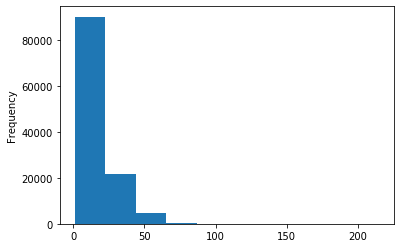

In [8]:
train['count'].plot.hist()

In [9]:
sum(train['count'] > 50)

2773

In [10]:
del train['count']

Check class distribution

In [11]:
train.groupby('rating').count()

,review_id,review,review_clean
rating,,,
1,13807,13807,13807
2,11262,11262,11262
3,28479,28479,28479
4,31931,31931,31931
5,31407,31407,31407


Sample the validation set

In [12]:
NUM_VAL = 1000

val = pd.DataFrame(columns=train.columns)
ratings = train['rating'].unique()

for rating in ratings:
    sub_df = train[train['rating'] == rating]
    sub_df = sub_df.sample(NUM_VAL, random_state=0)
    val = val.append(sub_df, ignore_index=True)

train = train[~train['review_id'].isin(val['review_id'])]

In [13]:
val.groupby('rating').count()

,review_id,review,review_clean
rating,,,
1,1000,1000,1000
2,1000,1000,1000
3,1000,1000,1000
4,1000,1000,1000
5,1000,1000,1000


In [14]:
train.groupby('rating').count()

,review_id,review,review_clean
rating,,,
1,12807,12807,12807
2,10262,10262,10262
3,27479,27479,27479
4,30931,30931,30931
5,30407,30407,30407


Repeat the steps for test set

In [15]:
test['review_clean'] = test['review'].str.lower()
test['review_clean'] = test['review_clean'].str.replace(r'’', '\'')
test['review_clean'] = test['review_clean'].str.replace(r'#[a-z]+', ' ')
test['review_clean'] = test['review_clean'].str.replace(r'@[a-z]+', ' ')
test['review_clean'] = test['review_clean'].str.replace(r'[\+\*=@#<>\(\)\[\]\^_]+', ' ')
test['review_clean'] = test['review_clean'].str.replace(r'[,!?;.:]+', '. ')

test['review_clean'] = test['review_clean'].str.replace(r'(other ){2,}', 'other ')
test['review_clean'] = test['review_clean'].str.replace(r'(kg ){2,}', 'kg ')
test['review_clean'] = test['review_clean'].str.replace(r'(mm ){2,}', 'mm ')
test['review_clean'] = test['review_clean'].str.replace(r'(amount of ){2,}', 'amount of ')
test['review_clean'] = test['review_clean'].str.replace(r'(good ){2,}', 'good ')
test['review_clean'] = test['review_clean'].str.replace(r'(great ){2,}', 'great ')

test['review_clean'] = test['review_clean'].apply(clean_emoji)
test['review_clean'] = test['review_clean'].str.replace(r'\s+', ' ')
test

,review_id,review,review_clean
0,1,"Great danger, cool, motif and cantik2 jg model...",great danger. cool. motif and cantik2 jg model...
1,2,One of the shades don't fit well,one of the shades don't fit well
2,3,Very comfortable,very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...,fast delivery. product expiry is on dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...,it's sooooo cute. i like playing with the glit...
...,...,...,...
60422,60423,Product has been succesfully ordered and shipp...,product has been succesfully ordered and shipp...
60423,60424,Opening time a little scared. Fear dalemnya de...,opening time a little scared. fear dalemnya de...
60424,60425,The product quality is excellent. The origina...,the product quality is excellent. the origina...
60425,60426,They 're holding up REALLY well also .,they 're holding up really well also .


In [16]:
train.to_csv('train_bert.csv', index=False)
val.to_csv('val_bert.csv', index=False)
test.to_csv('test_bert.csv', index=False)